# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The pickled German Traffic Signs Dataset can be downloaded [here]( https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip). Images in the pickle files have been resized to 32 x 32 pixels.

In [2]:
import os
import os.path

# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
print(X_train.shape)

(34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [59]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd


# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate((y_train, y_valid, y_test))))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
# Show sign key-values
import csv
reader = csv.reader(open('signnames.csv', 'r'))
sign_dict = {}
for k, v in reader:
    try:
        sign_dict[int(k)] = v
    except:
        continue

sign_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

### Sample of each type of sign from training set

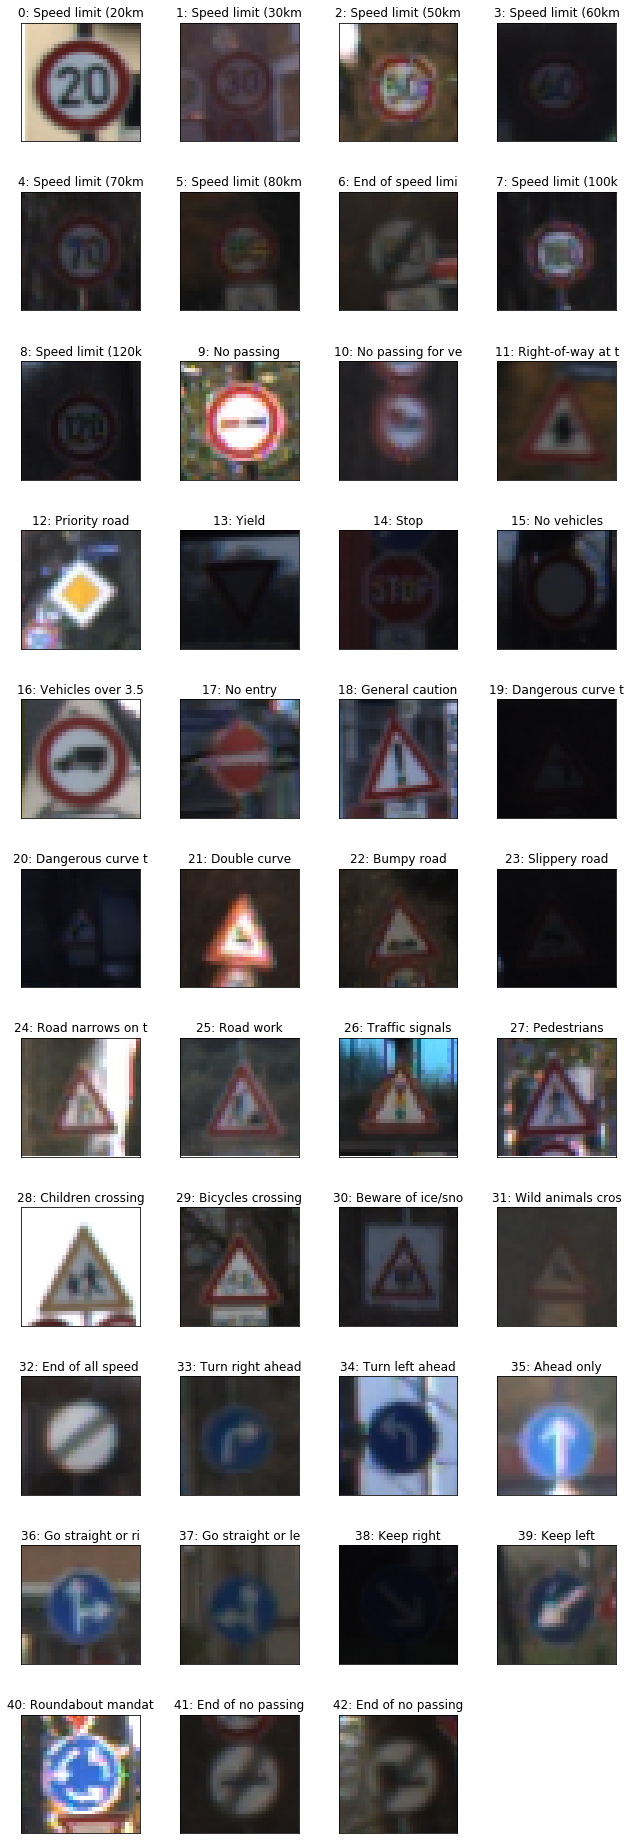

In [7]:
fig = plt.figure(figsize=(9, 26)) # figsize width by height in inches
signs = X_train
labels = y_train

for key in sign_dict.keys():
    label_index = labels.tolist().index(int(key)) # get the first index in labels based on key
    label = int(labels[label_index])              # get the label value from labels
    image = signs[label_index]                    # get the corresponding image from signs
    sub_plt = fig.add_subplot(11, 4, key+1) # 6 rows, 8 columns, subplot number
    sub_plt.set_xticks([])
    sub_plt.set_yticks([])
    sub_plt.set_title(str(label) + ': ' + sign_dict[label][:17])
    sub_plt.imshow(image)
    
fig.tight_layout()    
plt.show()

### Distribution of the different types of traffic signs

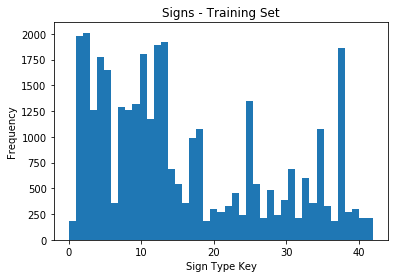

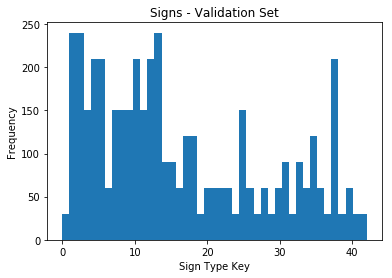

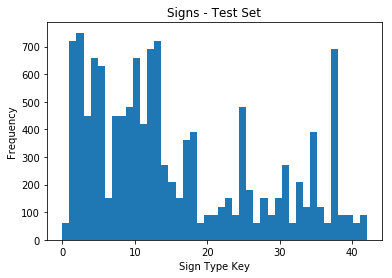

In [8]:

def hist_signs(x, dataset):
    plt.hist(x, bins=n_classes)
    plt.title('Signs - ' + dataset + ' Set', loc='center')
    plt.xlabel('Sign Type Key')
    plt.ylabel('Frequency')
    plt.show()

hist_signs(y_train, 'Training')
hist_signs(y_valid, 'Validation')
hist_signs(y_test, 'Test')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
# Preprocessing
# Minimal normalization to have zero mean and equal variance. 
#
# Note: See the 1st layer of LeNet5_plus function where a
# [1, 1, 3, 1] convolution filter accomplishes similar task 
# of converting data to grayscale without having to modify 
# the data before entering the training pipeline.

def normalize(x):
    return (x - 128.0) / 128.0
    
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

In [10]:
def D_out(D, F, P, S):
    """
    Helper function to calculate output dimensions
    """
    return ((D - F + 2 * P) / S) + 1

D_out(14, 5, 0, 1)

10.0

### Model Architecture

In [11]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet5(x):
    """
    Base architecture from LeNet lab.
    
    ** N O T E ************************************************************ 
    ** This is not the final architecture used. See LeNet5_plus() below. **
    ***********************************************************************
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 6], mu, sigma)),
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16], mu, sigma)),
    'wfc1': tf.Variable(tf.random_normal([5*5*16, 120], mu, sigma)),
    'wfc2': tf.Variable(tf.random_normal([120, 84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([84, n_classes], mu, sigma))}

    biases = {
    'bc1': tf.Variable(tf.random_normal([6], mu, sigma)),
    'bc2': tf.Variable(tf.random_normal([16], mu, sigma)),
    'bfc1': tf.Variable(tf.random_normal([120], mu, sigma)),
    'bfc2': tf.Variable(tf.random_normal([84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([n_classes], mu, sigma))}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv1')
    
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
                        
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits



In [12]:
def LeNet3(x):
    """
    Based on LeNet5 architecture from the lab.
    + Changed convolution kernel (filters) to 3x3.
    + Adjusted subsequent layers' filter sizes to accomodate.
    + Added additional fully connected layer.
    
    ** N O T E ************************************************************ 
    ** This is not the final architecture used. See LeNet5_plus() below. **
    ***********************************************************************
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 3, 6], mu, sigma)),
    'wc2': tf.Variable(tf.random_normal([3, 3, 6, 16], mu, sigma)),
    'wfc1': tf.Variable(tf.random_normal([7*7*16, 400], mu, sigma)),
    'wfc2': tf.Variable(tf.random_normal([400, 120], mu, sigma)),    
    'wfc3': tf.Variable(tf.random_normal([120, 84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([84, n_classes], mu, sigma))}

    biases = {
    'bc1': tf.Variable(tf.random_normal([6], mu, sigma)),
    'bc2': tf.Variable(tf.random_normal([16], mu, sigma)),
    'bfc1': tf.Variable(tf.random_normal([400], mu, sigma)),
    'bfc2': tf.Variable(tf.random_normal([120], mu, sigma)),    
    'bfc3': tf.Variable(tf.random_normal([84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([n_classes], mu, sigma))}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    conv1 = tf.nn.conv2d(x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='SAME',
                         use_cudnn_on_gpu=True, name='conv1')
    
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 32x32x6. Output = 16x16x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 16x16x16.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
                        
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 16x16x16. Output = 7x7x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 7x7x16. Output = 784.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 784. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc3 = tf.add(tf.matmul(fc2, weights['wfc3']), biases['bfc3'])

    # Activation.
    fc3 = tf.nn.relu(fc3)

    # Layer 6: Fully Connected. Input = 84. Output = 42.
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return logits



In [13]:
def LeNet5_plus(x, keep_prob):
    """
    ** Final architecture derived from LeNet5 model with the following modifications:
    
    + Added a "pre-processing" layer at the front, using a 1x1 projection [1, 1, 3, 1]
      to transform the input image to a single layer (channel); same as grayscale image
    + Increased convolution output depths
    + Added an additional fully connected layer.
    + Increased hiddent units in each fully connected layer.
    + Added dropout to the fully connected layers
    + Initialized biases with zeroes instead of random_normal
    """
    # Arguments used for tf.truncated_normal, randomly defines
    # variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc0': tf.Variable(tf.random_normal([1, 1, 3, 1], mu, sigma)),
        'wc1': tf.Variable(tf.random_normal([5, 5, 1, 20], mu, sigma)),
        'wc2': tf.Variable(tf.random_normal([5, 5, 20, 36], mu, sigma)),
        'wfc1': tf.Variable(tf.random_normal([5*5*36, 1024], mu, sigma)),
        'wfc2': tf.Variable(tf.random_normal([1024, 512], mu, sigma)),
        'wfc3': tf.Variable(tf.random_normal([512, 128], mu, sigma)),    
        'out': tf.Variable(tf.random_normal([128, n_classes], mu, sigma))
    }

    biases = {
        'bc0': tf.Variable(tf.zeros([1])),
        'bc1': tf.Variable(tf.zeros([20])),
        'bc2': tf.Variable(tf.zeros([36])),
        'bfc1': tf.Variable(tf.zeros([1024])),
        'bfc2': tf.Variable(tf.zeros([512])),
        'bfc3': tf.Variable(tf.zeros([128])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }
    
    # "Preprocess" - 1x1 projection to reduce input image to a single layer(channel)
    conv0 = tf.nn.conv2d(x, filter=weights['wc0'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv0')
                        
    conv0 = tf.nn.bias_add(conv0, biases['bc0'])
    conv0 = tf.nn.relu(conv0)
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1 = tf.nn.conv2d(conv0, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv1')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
      # Activation.
    conv1 = tf.nn.relu(conv1)
      # Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x36.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    conv2 = tf.nn.relu(conv2)
      # Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x36. Output = 900.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 900. Output = 1024.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    fc1 = tf.nn.dropout(fc1, keep_prob) # Dropout
    fc1 = tf.nn.relu(fc1) # Activation
    
    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    fc2 = tf.nn.dropout(fc2, keep_prob)
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 512. Output = 128.
    fc3 = tf.add(tf.matmul(fc2, weights['wfc3']), biases['bfc3'])
    fc3 = tf.nn.dropout(fc3, keep_prob)
    fc3 = tf.nn.relu(fc3)
    
    # Layer 6: Fully Connected. Input = 128. Output = 43.
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return logits


In [14]:
# Placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x_features')
y = tf.placeholder(tf.int32, (None), name='y_labels')
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
###### Training Pipeline ######

learn_rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128

#logits = LeNet5(x)
#logits = LeNet3(x)
logits = LeNet5_plus(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
###### Model Evaluation ######

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
###### Train the model ######

import time

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    start_t = time.process_time()
    
    for i in range(EPOCHS):
        print("\nEPOCH...{}".format(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.45})
            
            training_accuracy = evaluate(batch_x, batch_y)
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {:2d}, Batch {:3d} - Training accuracy: {:.3f}...Validation accuracy: {:.3f}"
                .format(i+1, int(end/BATCH_SIZE), training_accuracy, validation_accuracy))
    
    end_t = time.process_time()
    print("\nTotal training time: {}".format(end_t - start_t))
    
    path = './model/'
    modelfile = path + 'lenet'
    if not os.path.exists(path):
        os.mkdir(path)
        
    saver.save(sess, modelfile)
    print('\nModel saved.')

Training...

EPOCH...1
EPOCH  1, Batch   1 - Training accuracy: 0.070...Validation accuracy: 0.059
EPOCH  1, Batch   2 - Training accuracy: 0.078...Validation accuracy: 0.054
EPOCH  1, Batch   3 - Training accuracy: 0.070...Validation accuracy: 0.056
EPOCH  1, Batch   4 - Training accuracy: 0.070...Validation accuracy: 0.064
EPOCH  1, Batch   5 - Training accuracy: 0.086...Validation accuracy: 0.074
EPOCH  1, Batch   6 - Training accuracy: 0.031...Validation accuracy: 0.077
EPOCH  1, Batch   7 - Training accuracy: 0.055...Validation accuracy: 0.080
EPOCH  1, Batch   8 - Training accuracy: 0.086...Validation accuracy: 0.076
EPOCH  1, Batch   9 - Training accuracy: 0.078...Validation accuracy: 0.074
EPOCH  1, Batch  10 - Training accuracy: 0.062...Validation accuracy: 0.072
EPOCH  1, Batch  11 - Training accuracy: 0.062...Validation accuracy: 0.071
EPOCH  1, Batch  12 - Training accuracy: 0.078...Validation accuracy: 0.074
EPOCH  1, Batch  13 - Training accuracy: 0.070...Validation accur

EPOCH  1, Batch 109 - Training accuracy: 0.133...Validation accuracy: 0.132
EPOCH  1, Batch 110 - Training accuracy: 0.188...Validation accuracy: 0.130
EPOCH  1, Batch 111 - Training accuracy: 0.180...Validation accuracy: 0.132
EPOCH  1, Batch 112 - Training accuracy: 0.148...Validation accuracy: 0.132
EPOCH  1, Batch 113 - Training accuracy: 0.195...Validation accuracy: 0.131
EPOCH  1, Batch 114 - Training accuracy: 0.188...Validation accuracy: 0.133
EPOCH  1, Batch 115 - Training accuracy: 0.219...Validation accuracy: 0.137
EPOCH  1, Batch 116 - Training accuracy: 0.227...Validation accuracy: 0.137
EPOCH  1, Batch 117 - Training accuracy: 0.148...Validation accuracy: 0.138
EPOCH  1, Batch 118 - Training accuracy: 0.234...Validation accuracy: 0.140
EPOCH  1, Batch 119 - Training accuracy: 0.148...Validation accuracy: 0.141
EPOCH  1, Batch 120 - Training accuracy: 0.203...Validation accuracy: 0.142
EPOCH  1, Batch 121 - Training accuracy: 0.188...Validation accuracy: 0.144
EPOCH  1, Ba

EPOCH  1, Batch 217 - Training accuracy: 0.453...Validation accuracy: 0.418
EPOCH  1, Batch 218 - Training accuracy: 0.523...Validation accuracy: 0.429
EPOCH  1, Batch 219 - Training accuracy: 0.531...Validation accuracy: 0.436
EPOCH  1, Batch 220 - Training accuracy: 0.430...Validation accuracy: 0.432
EPOCH  1, Batch 221 - Training accuracy: 0.430...Validation accuracy: 0.442
EPOCH  1, Batch 222 - Training accuracy: 0.609...Validation accuracy: 0.452
EPOCH  1, Batch 223 - Training accuracy: 0.477...Validation accuracy: 0.457
EPOCH  1, Batch 224 - Training accuracy: 0.586...Validation accuracy: 0.457
EPOCH  1, Batch 225 - Training accuracy: 0.500...Validation accuracy: 0.455
EPOCH  1, Batch 226 - Training accuracy: 0.539...Validation accuracy: 0.455
EPOCH  1, Batch 227 - Training accuracy: 0.516...Validation accuracy: 0.463
EPOCH  1, Batch 228 - Training accuracy: 0.547...Validation accuracy: 0.455
EPOCH  1, Batch 229 - Training accuracy: 0.500...Validation accuracy: 0.454
EPOCH  1, Ba

EPOCH  2, Batch  53 - Training accuracy: 0.664...Validation accuracy: 0.658
EPOCH  2, Batch  54 - Training accuracy: 0.703...Validation accuracy: 0.662
EPOCH  2, Batch  55 - Training accuracy: 0.711...Validation accuracy: 0.664
EPOCH  2, Batch  56 - Training accuracy: 0.688...Validation accuracy: 0.674
EPOCH  2, Batch  57 - Training accuracy: 0.695...Validation accuracy: 0.682
EPOCH  2, Batch  58 - Training accuracy: 0.703...Validation accuracy: 0.684
EPOCH  2, Batch  59 - Training accuracy: 0.734...Validation accuracy: 0.691
EPOCH  2, Batch  60 - Training accuracy: 0.781...Validation accuracy: 0.700
EPOCH  2, Batch  61 - Training accuracy: 0.742...Validation accuracy: 0.696
EPOCH  2, Batch  62 - Training accuracy: 0.789...Validation accuracy: 0.692
EPOCH  2, Batch  63 - Training accuracy: 0.773...Validation accuracy: 0.694
EPOCH  2, Batch  64 - Training accuracy: 0.805...Validation accuracy: 0.706
EPOCH  2, Batch  65 - Training accuracy: 0.750...Validation accuracy: 0.704
EPOCH  2, Ba

EPOCH  2, Batch 161 - Training accuracy: 0.875...Validation accuracy: 0.817
EPOCH  2, Batch 162 - Training accuracy: 0.789...Validation accuracy: 0.813
EPOCH  2, Batch 163 - Training accuracy: 0.836...Validation accuracy: 0.811
EPOCH  2, Batch 164 - Training accuracy: 0.875...Validation accuracy: 0.818
EPOCH  2, Batch 165 - Training accuracy: 0.797...Validation accuracy: 0.823
EPOCH  2, Batch 166 - Training accuracy: 0.852...Validation accuracy: 0.825
EPOCH  2, Batch 167 - Training accuracy: 0.922...Validation accuracy: 0.823
EPOCH  2, Batch 168 - Training accuracy: 0.898...Validation accuracy: 0.822
EPOCH  2, Batch 169 - Training accuracy: 0.836...Validation accuracy: 0.816
EPOCH  2, Batch 170 - Training accuracy: 0.859...Validation accuracy: 0.812
EPOCH  2, Batch 171 - Training accuracy: 0.820...Validation accuracy: 0.800
EPOCH  2, Batch 172 - Training accuracy: 0.852...Validation accuracy: 0.803
EPOCH  2, Batch 173 - Training accuracy: 0.883...Validation accuracy: 0.814
EPOCH  2, Ba

EPOCH  2, Batch 269 - Training accuracy: 0.859...Validation accuracy: 0.881
EPOCH  2, Batch 270 - Training accuracy: 0.906...Validation accuracy: 0.878
EPOCH  2, Batch 271 - Training accuracy: 0.914...Validation accuracy: 0.876
EPOCH  2, Batch 272 - Training accuracy: 0.955...Validation accuracy: 0.871

EPOCH...3
EPOCH  3, Batch   1 - Training accuracy: 0.883...Validation accuracy: 0.870
EPOCH  3, Batch   2 - Training accuracy: 0.922...Validation accuracy: 0.866
EPOCH  3, Batch   3 - Training accuracy: 0.938...Validation accuracy: 0.863
EPOCH  3, Batch   4 - Training accuracy: 0.953...Validation accuracy: 0.857
EPOCH  3, Batch   5 - Training accuracy: 0.875...Validation accuracy: 0.851
EPOCH  3, Batch   6 - Training accuracy: 0.930...Validation accuracy: 0.845
EPOCH  3, Batch   7 - Training accuracy: 0.922...Validation accuracy: 0.843
EPOCH  3, Batch   8 - Training accuracy: 0.938...Validation accuracy: 0.846
EPOCH  3, Batch   9 - Training accuracy: 0.938...Validation accuracy: 0.852
E

EPOCH  3, Batch 105 - Training accuracy: 0.953...Validation accuracy: 0.887
EPOCH  3, Batch 106 - Training accuracy: 0.961...Validation accuracy: 0.882
EPOCH  3, Batch 107 - Training accuracy: 0.961...Validation accuracy: 0.876
EPOCH  3, Batch 108 - Training accuracy: 0.961...Validation accuracy: 0.876
EPOCH  3, Batch 109 - Training accuracy: 0.906...Validation accuracy: 0.878
EPOCH  3, Batch 110 - Training accuracy: 0.945...Validation accuracy: 0.883
EPOCH  3, Batch 111 - Training accuracy: 0.961...Validation accuracy: 0.885
EPOCH  3, Batch 112 - Training accuracy: 0.961...Validation accuracy: 0.886
EPOCH  3, Batch 113 - Training accuracy: 0.906...Validation accuracy: 0.887
EPOCH  3, Batch 114 - Training accuracy: 0.977...Validation accuracy: 0.888
EPOCH  3, Batch 115 - Training accuracy: 0.922...Validation accuracy: 0.891
EPOCH  3, Batch 116 - Training accuracy: 0.930...Validation accuracy: 0.895
EPOCH  3, Batch 117 - Training accuracy: 0.922...Validation accuracy: 0.896
EPOCH  3, Ba

EPOCH  3, Batch 213 - Training accuracy: 0.961...Validation accuracy: 0.912
EPOCH  3, Batch 214 - Training accuracy: 0.945...Validation accuracy: 0.911
EPOCH  3, Batch 215 - Training accuracy: 0.945...Validation accuracy: 0.910
EPOCH  3, Batch 216 - Training accuracy: 0.945...Validation accuracy: 0.910
EPOCH  3, Batch 217 - Training accuracy: 0.938...Validation accuracy: 0.908
EPOCH  3, Batch 218 - Training accuracy: 0.945...Validation accuracy: 0.908
EPOCH  3, Batch 219 - Training accuracy: 0.914...Validation accuracy: 0.907
EPOCH  3, Batch 220 - Training accuracy: 0.969...Validation accuracy: 0.905
EPOCH  3, Batch 221 - Training accuracy: 0.969...Validation accuracy: 0.903
EPOCH  3, Batch 222 - Training accuracy: 0.969...Validation accuracy: 0.900
EPOCH  3, Batch 223 - Training accuracy: 0.938...Validation accuracy: 0.900
EPOCH  3, Batch 224 - Training accuracy: 0.961...Validation accuracy: 0.901
EPOCH  3, Batch 225 - Training accuracy: 0.945...Validation accuracy: 0.899
EPOCH  3, Ba

EPOCH  4, Batch  49 - Training accuracy: 0.969...Validation accuracy: 0.917
EPOCH  4, Batch  50 - Training accuracy: 0.953...Validation accuracy: 0.919
EPOCH  4, Batch  51 - Training accuracy: 0.930...Validation accuracy: 0.922
EPOCH  4, Batch  52 - Training accuracy: 0.992...Validation accuracy: 0.920
EPOCH  4, Batch  53 - Training accuracy: 0.953...Validation accuracy: 0.919
EPOCH  4, Batch  54 - Training accuracy: 0.961...Validation accuracy: 0.920
EPOCH  4, Batch  55 - Training accuracy: 0.938...Validation accuracy: 0.921
EPOCH  4, Batch  56 - Training accuracy: 0.953...Validation accuracy: 0.921
EPOCH  4, Batch  57 - Training accuracy: 0.969...Validation accuracy: 0.922
EPOCH  4, Batch  58 - Training accuracy: 0.961...Validation accuracy: 0.920
EPOCH  4, Batch  59 - Training accuracy: 0.977...Validation accuracy: 0.917
EPOCH  4, Batch  60 - Training accuracy: 0.969...Validation accuracy: 0.917
EPOCH  4, Batch  61 - Training accuracy: 0.992...Validation accuracy: 0.915
EPOCH  4, Ba

EPOCH  4, Batch 157 - Training accuracy: 0.914...Validation accuracy: 0.933
EPOCH  4, Batch 158 - Training accuracy: 0.977...Validation accuracy: 0.934
EPOCH  4, Batch 159 - Training accuracy: 0.961...Validation accuracy: 0.934
EPOCH  4, Batch 160 - Training accuracy: 0.977...Validation accuracy: 0.934
EPOCH  4, Batch 161 - Training accuracy: 0.953...Validation accuracy: 0.936
EPOCH  4, Batch 162 - Training accuracy: 0.977...Validation accuracy: 0.937
EPOCH  4, Batch 163 - Training accuracy: 0.945...Validation accuracy: 0.937
EPOCH  4, Batch 164 - Training accuracy: 0.992...Validation accuracy: 0.937
EPOCH  4, Batch 165 - Training accuracy: 0.977...Validation accuracy: 0.938
EPOCH  4, Batch 166 - Training accuracy: 0.969...Validation accuracy: 0.938
EPOCH  4, Batch 167 - Training accuracy: 0.984...Validation accuracy: 0.938
EPOCH  4, Batch 168 - Training accuracy: 0.969...Validation accuracy: 0.938
EPOCH  4, Batch 169 - Training accuracy: 0.969...Validation accuracy: 0.938
EPOCH  4, Ba

EPOCH  4, Batch 265 - Training accuracy: 0.984...Validation accuracy: 0.942
EPOCH  4, Batch 266 - Training accuracy: 0.992...Validation accuracy: 0.942
EPOCH  4, Batch 267 - Training accuracy: 0.961...Validation accuracy: 0.941
EPOCH  4, Batch 268 - Training accuracy: 0.977...Validation accuracy: 0.939
EPOCH  4, Batch 269 - Training accuracy: 0.977...Validation accuracy: 0.937
EPOCH  4, Batch 270 - Training accuracy: 0.977...Validation accuracy: 0.937
EPOCH  4, Batch 271 - Training accuracy: 0.953...Validation accuracy: 0.940
EPOCH  4, Batch 272 - Training accuracy: 0.955...Validation accuracy: 0.941

EPOCH...5
EPOCH  5, Batch   1 - Training accuracy: 0.969...Validation accuracy: 0.944
EPOCH  5, Batch   2 - Training accuracy: 0.984...Validation accuracy: 0.945
EPOCH  5, Batch   3 - Training accuracy: 0.992...Validation accuracy: 0.943
EPOCH  5, Batch   4 - Training accuracy: 0.977...Validation accuracy: 0.941
EPOCH  5, Batch   5 - Training accuracy: 0.969...Validation accuracy: 0.941
E

EPOCH  5, Batch 101 - Training accuracy: 1.000...Validation accuracy: 0.958
EPOCH  5, Batch 102 - Training accuracy: 1.000...Validation accuracy: 0.958
EPOCH  5, Batch 103 - Training accuracy: 0.977...Validation accuracy: 0.956
EPOCH  5, Batch 104 - Training accuracy: 0.992...Validation accuracy: 0.958
EPOCH  5, Batch 105 - Training accuracy: 0.969...Validation accuracy: 0.959
EPOCH  5, Batch 106 - Training accuracy: 0.984...Validation accuracy: 0.959
EPOCH  5, Batch 107 - Training accuracy: 0.977...Validation accuracy: 0.958
EPOCH  5, Batch 108 - Training accuracy: 0.992...Validation accuracy: 0.959
EPOCH  5, Batch 109 - Training accuracy: 0.992...Validation accuracy: 0.956
EPOCH  5, Batch 110 - Training accuracy: 0.992...Validation accuracy: 0.953
EPOCH  5, Batch 111 - Training accuracy: 0.984...Validation accuracy: 0.951
EPOCH  5, Batch 112 - Training accuracy: 0.977...Validation accuracy: 0.949
EPOCH  5, Batch 113 - Training accuracy: 0.992...Validation accuracy: 0.951
EPOCH  5, Ba

EPOCH  5, Batch 209 - Training accuracy: 0.992...Validation accuracy: 0.942
EPOCH  5, Batch 210 - Training accuracy: 0.992...Validation accuracy: 0.940
EPOCH  5, Batch 211 - Training accuracy: 0.984...Validation accuracy: 0.940
EPOCH  5, Batch 212 - Training accuracy: 0.984...Validation accuracy: 0.942
EPOCH  5, Batch 213 - Training accuracy: 1.000...Validation accuracy: 0.944
EPOCH  5, Batch 214 - Training accuracy: 0.969...Validation accuracy: 0.945
EPOCH  5, Batch 215 - Training accuracy: 0.992...Validation accuracy: 0.946
EPOCH  5, Batch 216 - Training accuracy: 0.984...Validation accuracy: 0.949
EPOCH  5, Batch 217 - Training accuracy: 1.000...Validation accuracy: 0.951
EPOCH  5, Batch 218 - Training accuracy: 0.977...Validation accuracy: 0.953
EPOCH  5, Batch 219 - Training accuracy: 1.000...Validation accuracy: 0.952
EPOCH  5, Batch 220 - Training accuracy: 0.992...Validation accuracy: 0.951
EPOCH  5, Batch 221 - Training accuracy: 0.984...Validation accuracy: 0.951
EPOCH  5, Ba

EPOCH  6, Batch  45 - Training accuracy: 0.992...Validation accuracy: 0.941
EPOCH  6, Batch  46 - Training accuracy: 0.992...Validation accuracy: 0.940
EPOCH  6, Batch  47 - Training accuracy: 0.992...Validation accuracy: 0.944
EPOCH  6, Batch  48 - Training accuracy: 0.992...Validation accuracy: 0.948
EPOCH  6, Batch  49 - Training accuracy: 0.984...Validation accuracy: 0.949
EPOCH  6, Batch  50 - Training accuracy: 0.984...Validation accuracy: 0.951
EPOCH  6, Batch  51 - Training accuracy: 0.977...Validation accuracy: 0.953
EPOCH  6, Batch  52 - Training accuracy: 0.992...Validation accuracy: 0.955
EPOCH  6, Batch  53 - Training accuracy: 1.000...Validation accuracy: 0.957
EPOCH  6, Batch  54 - Training accuracy: 1.000...Validation accuracy: 0.959
EPOCH  6, Batch  55 - Training accuracy: 0.984...Validation accuracy: 0.958
EPOCH  6, Batch  56 - Training accuracy: 0.977...Validation accuracy: 0.959
EPOCH  6, Batch  57 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Ba

EPOCH  6, Batch 153 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  6, Batch 154 - Training accuracy: 0.992...Validation accuracy: 0.962
EPOCH  6, Batch 155 - Training accuracy: 0.984...Validation accuracy: 0.961
EPOCH  6, Batch 156 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Batch 157 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Batch 158 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  6, Batch 159 - Training accuracy: 0.992...Validation accuracy: 0.963
EPOCH  6, Batch 160 - Training accuracy: 0.984...Validation accuracy: 0.961
EPOCH  6, Batch 161 - Training accuracy: 0.977...Validation accuracy: 0.961
EPOCH  6, Batch 162 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Batch 163 - Training accuracy: 1.000...Validation accuracy: 0.960
EPOCH  6, Batch 164 - Training accuracy: 0.992...Validation accuracy: 0.959
EPOCH  6, Batch 165 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Ba

EPOCH  6, Batch 261 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  6, Batch 262 - Training accuracy: 0.984...Validation accuracy: 0.960
EPOCH  6, Batch 263 - Training accuracy: 1.000...Validation accuracy: 0.960
EPOCH  6, Batch 264 - Training accuracy: 1.000...Validation accuracy: 0.959
EPOCH  6, Batch 265 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  6, Batch 266 - Training accuracy: 0.984...Validation accuracy: 0.963
EPOCH  6, Batch 267 - Training accuracy: 0.977...Validation accuracy: 0.963
EPOCH  6, Batch 268 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  6, Batch 269 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  6, Batch 270 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  6, Batch 271 - Training accuracy: 0.992...Validation accuracy: 0.964
EPOCH  6, Batch 272 - Training accuracy: 1.000...Validation accuracy: 0.964

EPOCH...7
EPOCH  7, Batch   1 - Training accuracy: 0.992...Validation accuracy: 0.963
E

EPOCH  7, Batch  97 - Training accuracy: 0.977...Validation accuracy: 0.957
EPOCH  7, Batch  98 - Training accuracy: 0.992...Validation accuracy: 0.953
EPOCH  7, Batch  99 - Training accuracy: 0.977...Validation accuracy: 0.950
EPOCH  7, Batch 100 - Training accuracy: 0.992...Validation accuracy: 0.947
EPOCH  7, Batch 101 - Training accuracy: 0.984...Validation accuracy: 0.949
EPOCH  7, Batch 102 - Training accuracy: 1.000...Validation accuracy: 0.952
EPOCH  7, Batch 103 - Training accuracy: 0.992...Validation accuracy: 0.956
EPOCH  7, Batch 104 - Training accuracy: 1.000...Validation accuracy: 0.959
EPOCH  7, Batch 105 - Training accuracy: 0.992...Validation accuracy: 0.959
EPOCH  7, Batch 106 - Training accuracy: 0.992...Validation accuracy: 0.958
EPOCH  7, Batch 107 - Training accuracy: 0.969...Validation accuracy: 0.958
EPOCH  7, Batch 108 - Training accuracy: 1.000...Validation accuracy: 0.956
EPOCH  7, Batch 109 - Training accuracy: 1.000...Validation accuracy: 0.956
EPOCH  7, Ba

EPOCH  7, Batch 205 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  7, Batch 206 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  7, Batch 207 - Training accuracy: 1.000...Validation accuracy: 0.961
EPOCH  7, Batch 208 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  7, Batch 209 - Training accuracy: 0.992...Validation accuracy: 0.960
EPOCH  7, Batch 210 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  7, Batch 211 - Training accuracy: 1.000...Validation accuracy: 0.961
EPOCH  7, Batch 212 - Training accuracy: 0.992...Validation accuracy: 0.960
EPOCH  7, Batch 213 - Training accuracy: 0.992...Validation accuracy: 0.960
EPOCH  7, Batch 214 - Training accuracy: 1.000...Validation accuracy: 0.960
EPOCH  7, Batch 215 - Training accuracy: 0.984...Validation accuracy: 0.958
EPOCH  7, Batch 216 - Training accuracy: 0.992...Validation accuracy: 0.957
EPOCH  7, Batch 217 - Training accuracy: 1.000...Validation accuracy: 0.957
EPOCH  7, Ba

EPOCH  8, Batch  41 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  8, Batch  42 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  8, Batch  43 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  8, Batch  44 - Training accuracy: 0.992...Validation accuracy: 0.962
EPOCH  8, Batch  45 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  8, Batch  46 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  8, Batch  47 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  8, Batch  48 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  8, Batch  49 - Training accuracy: 1.000...Validation accuracy: 0.961
EPOCH  8, Batch  50 - Training accuracy: 1.000...Validation accuracy: 0.960
EPOCH  8, Batch  51 - Training accuracy: 1.000...Validation accuracy: 0.960
EPOCH  8, Batch  52 - Training accuracy: 0.984...Validation accuracy: 0.959
EPOCH  8, Batch  53 - Training accuracy: 1.000...Validation accuracy: 0.958
EPOCH  8, Ba

EPOCH  8, Batch 149 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH  8, Batch 150 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  8, Batch 151 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  8, Batch 152 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  8, Batch 153 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  8, Batch 154 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  8, Batch 155 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  8, Batch 156 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH  8, Batch 157 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  8, Batch 158 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  8, Batch 159 - Training accuracy: 0.992...Validation accuracy: 0.966
EPOCH  8, Batch 160 - Training accuracy: 0.992...Validation accuracy: 0.966
EPOCH  8, Batch 161 - Training accuracy: 1.000...Validation accuracy: 0.967
EPOCH  8, Ba

EPOCH  8, Batch 257 - Training accuracy: 0.977...Validation accuracy: 0.953
EPOCH  8, Batch 258 - Training accuracy: 0.992...Validation accuracy: 0.952
EPOCH  8, Batch 259 - Training accuracy: 1.000...Validation accuracy: 0.952
EPOCH  8, Batch 260 - Training accuracy: 0.992...Validation accuracy: 0.954
EPOCH  8, Batch 261 - Training accuracy: 0.992...Validation accuracy: 0.956
EPOCH  8, Batch 262 - Training accuracy: 0.992...Validation accuracy: 0.959
EPOCH  8, Batch 263 - Training accuracy: 1.000...Validation accuracy: 0.961
EPOCH  8, Batch 264 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  8, Batch 265 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  8, Batch 266 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH  8, Batch 267 - Training accuracy: 1.000...Validation accuracy: 0.968
EPOCH  8, Batch 268 - Training accuracy: 1.000...Validation accuracy: 0.968
EPOCH  8, Batch 269 - Training accuracy: 0.992...Validation accuracy: 0.968
EPOCH  8, Ba

EPOCH  9, Batch  93 - Training accuracy: 1.000...Validation accuracy: 0.959
EPOCH  9, Batch  94 - Training accuracy: 0.992...Validation accuracy: 0.960
EPOCH  9, Batch  95 - Training accuracy: 0.984...Validation accuracy: 0.960
EPOCH  9, Batch  96 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  9, Batch  97 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  9, Batch  98 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  9, Batch  99 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH  9, Batch 100 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH  9, Batch 101 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  9, Batch 102 - Training accuracy: 0.984...Validation accuracy: 0.965
EPOCH  9, Batch 103 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH  9, Batch 104 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  9, Batch 105 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH  9, Ba

EPOCH  9, Batch 201 - Training accuracy: 1.000...Validation accuracy: 0.969
EPOCH  9, Batch 202 - Training accuracy: 1.000...Validation accuracy: 0.969
EPOCH  9, Batch 203 - Training accuracy: 1.000...Validation accuracy: 0.968
EPOCH  9, Batch 204 - Training accuracy: 1.000...Validation accuracy: 0.967
EPOCH  9, Batch 205 - Training accuracy: 0.992...Validation accuracy: 0.965
EPOCH  9, Batch 206 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH  9, Batch 207 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  9, Batch 208 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  9, Batch 209 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  9, Batch 210 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH  9, Batch 211 - Training accuracy: 1.000...Validation accuracy: 0.961
EPOCH  9, Batch 212 - Training accuracy: 0.984...Validation accuracy: 0.962
EPOCH  9, Batch 213 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH  9, Ba

EPOCH 10, Batch  37 - Training accuracy: 1.000...Validation accuracy: 0.954
EPOCH 10, Batch  38 - Training accuracy: 0.992...Validation accuracy: 0.956
EPOCH 10, Batch  39 - Training accuracy: 0.992...Validation accuracy: 0.959
EPOCH 10, Batch  40 - Training accuracy: 0.992...Validation accuracy: 0.961
EPOCH 10, Batch  41 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH 10, Batch  42 - Training accuracy: 1.000...Validation accuracy: 0.964
EPOCH 10, Batch  43 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH 10, Batch  44 - Training accuracy: 0.992...Validation accuracy: 0.965
EPOCH 10, Batch  45 - Training accuracy: 0.992...Validation accuracy: 0.964
EPOCH 10, Batch  46 - Training accuracy: 1.000...Validation accuracy: 0.965
EPOCH 10, Batch  47 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH 10, Batch  48 - Training accuracy: 1.000...Validation accuracy: 0.963
EPOCH 10, Batch  49 - Training accuracy: 1.000...Validation accuracy: 0.962
EPOCH 10, Ba

EPOCH 10, Batch 145 - Training accuracy: 1.000...Validation accuracy: 0.969
EPOCH 10, Batch 146 - Training accuracy: 1.000...Validation accuracy: 0.970
EPOCH 10, Batch 147 - Training accuracy: 1.000...Validation accuracy: 0.970
EPOCH 10, Batch 148 - Training accuracy: 0.992...Validation accuracy: 0.971
EPOCH 10, Batch 149 - Training accuracy: 1.000...Validation accuracy: 0.971
EPOCH 10, Batch 150 - Training accuracy: 0.992...Validation accuracy: 0.970
EPOCH 10, Batch 151 - Training accuracy: 1.000...Validation accuracy: 0.969
EPOCH 10, Batch 152 - Training accuracy: 0.992...Validation accuracy: 0.969
EPOCH 10, Batch 153 - Training accuracy: 0.984...Validation accuracy: 0.968
EPOCH 10, Batch 154 - Training accuracy: 1.000...Validation accuracy: 0.968
EPOCH 10, Batch 155 - Training accuracy: 1.000...Validation accuracy: 0.967
EPOCH 10, Batch 156 - Training accuracy: 1.000...Validation accuracy: 0.966
EPOCH 10, Batch 157 - Training accuracy: 0.992...Validation accuracy: 0.965
EPOCH 10, Ba

EPOCH 10, Batch 253 - Training accuracy: 1.000...Validation accuracy: 0.972
EPOCH 10, Batch 254 - Training accuracy: 0.992...Validation accuracy: 0.972
EPOCH 10, Batch 255 - Training accuracy: 1.000...Validation accuracy: 0.972
EPOCH 10, Batch 256 - Training accuracy: 0.992...Validation accuracy: 0.972
EPOCH 10, Batch 257 - Training accuracy: 1.000...Validation accuracy: 0.971
EPOCH 10, Batch 258 - Training accuracy: 1.000...Validation accuracy: 0.973
EPOCH 10, Batch 259 - Training accuracy: 1.000...Validation accuracy: 0.973
EPOCH 10, Batch 260 - Training accuracy: 1.000...Validation accuracy: 0.974
EPOCH 10, Batch 261 - Training accuracy: 0.992...Validation accuracy: 0.974
EPOCH 10, Batch 262 - Training accuracy: 1.000...Validation accuracy: 0.974
EPOCH 10, Batch 263 - Training accuracy: 1.000...Validation accuracy: 0.974
EPOCH 10, Batch 264 - Training accuracy: 0.992...Validation accuracy: 0.974
EPOCH 10, Batch 265 - Training accuracy: 1.000...Validation accuracy: 0.971
EPOCH 10, Ba

### Training Notes

| Iteration | Model (function) | Learn rate | Epochs | Batch size | Validation accuracy | Total training time | Notes                                                                                                                            |
|----------:|:-----------------|:-----------|:------:|:----------:|:-------------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------|
|         1 | LeNet5           |      0.001 |   10   |     128    |               0.737 |           419.998 s |                                                                                                                                  |
|         2 | LeNet5           |      0.001 |   15   |     256    |               0.725 |                   - | Changing epochs and batch size showed no improvement in accuracy                                                                 |
|         3 | LeNet5           |     0.0001 |   20   |     256    |               0.561 |           789.800 s | Decreasing the learning rate to 0.0001 slowed down the training too much, resulting in accuracy of only 0.561 after 20 epochs.   |
|         4 | LeNet5           |      0.001 |   10   |     128    |               0.894 |           409.572 s | Fixed input normalization in preprocessing from (x - 128) / 128 to ((x - 128.0) / 128.0)                                     |
|         5 | LeNet3           |      0.001 |   10   |     128    |               0.869 |           442.429 s | Updated model to have smaller kernel size of 3x3 for convolution layers. Accuracy reduced a bit to 0.869                         |
|         6 | LeNet3           |      0.001 |   10   |     128    |               0.864 |           465.583 s | Updated 3x3 kernel model by adding an additional fully connected layer. Accuracy ended at 0.864                                  |
|         7 | LeNet5_plus      |      0.001 |   10   |     128    |               0.917 |           382.130 s | Revisited LeNet5 with 5x5 kernel for convolution layers. Added additional fully connected layer and resulted in accuracy of 0.917 |
|         8 | LeNet5_plus      |      0.005 |   10   |     128    |               0.880 |           412.327 s | Added 25% dropout to fully connected layers. Increased learning rate to 0.005                                                        |
|         9 | LeNet5_plus      |      0.001 |   10   |     256    |               0.866 |          6319.714 s | Removed dropouts to fully connected layers. Set learning rate back to 0.001. The training time looks way too long; I know I didn't sit and wait for 1.75 hours b/c I monitored it to completion. |
|        10 | LeNet5_plus      |      0.001 |   10   |     128    |               0.797 |           491.281 s | Added initial convolution layer with filter [1, 1, 3, 1] to let the network learn a 1-output grayscale layer before training continues. This should be equivalent to preprocessing the images by first converting them to grayscale. |
|        11 | LeNet5_plus      |      0.001 |   10   |     128    |               0.895 |           476.808 s | **Initialized biases with zeros instead of random_normal.** |
|        12 | LeNet5_plus      |      0.001 |   10   |     128    |               0.745 |           503.033 s | Add 50% dropout to first fully connected layer. |
|        13 | LeNet5_plus      |      0.001 |   10   |     128    |               0.922 |           501.152 s | Increased hidden units for the fully connected layers to 1024, 512, 256 |
|        14 | LeNet5_plus      |      0.001 |   10   |     128    |               **0.938** |           655.973 s | Increased depth of convolution layers. Added Dropout to 2nd fully connected layer fc2. Dropout rate set to 60% (keep_prob=0.4). Fully connected layers' hidden units changed to 1024, 512, 128 |
|        15 | LeNet5_plus      |    0.00075 |   10   |     128    |               **0.958** |           852.887 s | Changed learn rate to 0.00075 to slow down trainig a bit. Changed dropout to 55% (keep_prob=0.45). Added dropout to the 3rd fully connected layer. |
|        16 | LeNet5_plus      |    0.001 |   10   |     128    |               **0.965** |           778.259 s | Changed learn rate to 0.001. |

In [20]:
saver = tf.train.Saver()

In [62]:
###### Accuracy of the model on the Datasets ######

with tf.Session() as sess:
    saver.restore(sess, './model/lenet')
    print('Model restored.\n')
    
    train_accuracy = evaluate(X_train, y_train)
    print("Training set accuracy: {:.3f}".format(train_accuracy))
    
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Training set accuracy: {:.3f}".format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test set accuracy    : {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/lenet
Model restored.

Training set accuracy: 0.997
Training set accuracy: 0.965
Test set accuracy    : 0.950


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#### Where did the images come from?

Images were obtained using the Street View feature in [Google Earth](https://www.google.com/earth/ "Google Earth"). Navigating through random streets of Berlin, Germany traffic signs were encountered. Once traffic signs were identified, screenshots of the signs were made. Finally, using [an online image converter](http://convert-my-image.com/ImageConverter "convert-my-image.com"), the screenshots were scaled down to 32 x 32 png images.

In [22]:
from scipy import misc

img_dir = './predict_images/32x32/'
filenames = sorted(os.listdir(img_dir))
print(filenames)

# Store images into ndarray
X_pred = []
for f in filenames:
    img = misc.imread(img_dir + f, mode='RGB')
    X_pred.append(img)
X_pred = np.array(X_pred)

y_pred = np.array([35, 28, 1, 33, 13]) # assign the true labels for new images; See sign_dict above

['ahead-only.png', 'children-crossing.png', 'speed-30.png', 'turn-right-ahead.png', 'yield.png']


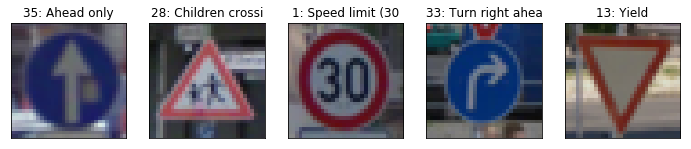

In [23]:
figure = plt.figure(figsize=(12, 3))

for i in range(len(X_pred)):
    image = X_pred[i]                   
    sub_plt = figure.add_subplot(1, 5, i+1)
    sub_plt.set_xticks([])
    sub_plt.set_yticks([])
    sub_plt.set_title(str(y_pred[i]) + ": " + sign_dict[y_pred[i]][:15])
    sub_plt.imshow(image)

### Predict the Sign Type for Each Image

In [24]:
X_pred = normalize(X_pred)

In [32]:
with tf.Session() as sess:
    saver.restore(sess, './model/lenet')
    print('Model restored.\n')

    predictions = tf.argmax(logits, 1)
    classifications = sess.run(predictions, feed_dict={x: X_pred, y: y_test, keep_prob: 1.0})
    print('Classifications: {}\n'.format(classifications))
    print("== Predictions ==\n")
    print(["{}: {}".format(str(i), sign_dict[i]) for i in classifications])

INFO:tensorflow:Restoring parameters from ./model/lenet
Model restored.

Classifications: [35 28  1 33 13]

== Predictions ==

['35: Ahead only', '28: Children crossing', '1: Speed limit (30km/h)', '33: Turn right ahead', '13: Yield']


### Analyze Performance

In [33]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

###### Accuracy of the New image set from the Web ######

with tf.Session() as sess:
    saver.restore(sess, './model/lenet')
    print('Model restored.')
    
    test_accuracy = evaluate(X_pred, y_pred)
    print("Image set accuracy: {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/lenet
Model restored.
Image set accuracy: 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [65]:
###### Top 5 Softmax Probabilities ######

with tf.Session() as sess:
    saver.restore(sess, './model/lenet')
    print('Model restored.')
    
    top_probs, class_labels = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: X_pred, keep_prob: 1.0})
    # NOTE: class_labels are the indicies (which happen to be the class labels for the traffic signs)
    # corresponding to the top probabilities
    
    print(top_probs)
    
    for i, sign_labels in enumerate(class_labels):
        labels = []
        for label in sign_labels:
            labels.append(sign_dict[label])
        print("Sign# {}: {}".format(i+1, labels))
    

INFO:tensorflow:Restoring parameters from ./model/lenet
Model restored.
[[ 26.6695137   12.40279961   9.0363884    8.71426392   5.85560083]
 [ 19.89128494   6.43030071   6.30514431   5.17498064   4.47676325]
 [ 32.02019501  17.54056168  12.34169197   7.52989483   3.29032612]
 [ 31.1642971    9.91294956   4.40828037   3.20767808   2.66226077]
 [ 89.34210968  38.46640015  29.0452404   22.83588409  20.59109688]]
Sign# 1: ['Ahead only', 'Speed limit (60km/h)', 'Turn left ahead', 'Go straight or right', 'No vehicles']
Sign# 2: ['Children crossing', 'Road narrows on the right', 'Dangerous curve to the right', 'Bicycles crossing', 'Speed limit (60km/h)']
Sign# 3: ['Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (70km/h)', 'Speed limit (20km/h)', 'Speed limit (80km/h)']
Sign# 4: ['Turn right ahead', 'Keep left', 'Go straight or left', 'Ahead only', 'Yield']
Sign# 5: ['Yield', 'No vehicles', 'Priority road', 'Ahead only', 'No passing']


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [52]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")